In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import keras as keras
from keras import models
from keras.layers import Flatten

from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from keras.utils import plot_model
from tensorflow.keras.models import Model, load_model
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate, Embedding

In [2]:
exe_df = pd.read_csv('exercise_data.csv')
train_df, test_df = train_test_split(exe_df, test_size=0.2, random_state=42)
exe_df

,User_ID,Exercise_Type,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Total_Calories_Burned
0,10796536,"Climbing hills, carrying 21 to 42 lb",male,65,179.0,89.0,7.0,88.0,39.4,17.109919
1,19207815,"Climbing hills, carrying up to 9 lbs",female,33,159.0,59.0,26.0,113.0,40.7,36.850243
2,11260824,"Track and field (high jump, pole vault)",female,23,161.0,56.0,7.0,85.0,39.7,8.067709
3,12388580,Curling,female,27,175.0,69.0,25.0,105.0,40.8,23.668024
4,14580760,Rugby,female,41,173.0,65.0,13.0,100.0,40.2,29.003823
...,...,...,...,...,...,...,...,...,...,...
3715,17731023,"Golf, miniature golf",male,77,187.0,89.0,15.0,89.0,40.0,13.737745
3716,15090337,"Tennis, singles",female,24,180.0,75.0,20.0,105.0,40.3,41.195632
3717,17454866,"Basketball, shooting baskets",female,35,167.0,69.0,11.0,96.0,39.8,11.732800
3718,19122789,Tai chi,female,28,158.0,55.0,9.0,90.0,40.1,6.791694


In [3]:

X_train_old, X_test_old, = train_test_split(exe_df, test_size = 0.2, random_state=42)

# Check 
print(f'The training dataset has {X_train_old.shape[0]} records and {X_train_old.shape[1]} columns.')
print(f'The testing dataset has {len(X_test_old)} records.')


The training dataset has 2976 records and 10 columns.
The testing dataset has 744 records.


In [6]:
numeric_features = [ 'User_ID','Exercise_Type','Age', 'Height', 'Weight', 'Duration','Heart_Rate', 'Body_Temp', 'Total_Calories_Burned']
categorical_features = ['Gender']

cts = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    remainder='passthrough'
)
transformed = cts.fit_transform(X_train_old)
column_names = (
    cts.named_transformers_["onehotencoder"].get_feature_names_out().tolist()+
    numeric_features

)

X_train_n = pd.DataFrame(transformed, columns=column_names)
cts.named_transformers_

{'onehotencoder': OneHotEncoder(),
 'remainder': FunctionTransformer(accept_sparse=True, check_inverse=False,
                     feature_names_out='one-to-one')}

In [8]:
#split the data

X_train_new, X_test_new, = train_test_split(X_train_n, test_size = 0.1, random_state=42)
y_train_new = X_train_new['Total_Calories_Burned'].values.astype('float32')

X_train_new

,Gender_female,Gender_male,User_ID,Exercise_Type,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Total_Calories_Burned
2620,0.0,1.0,14687327,Unicycling,37,178.0,88.0,7.0,86.0,39.2,10.571808
2353,1.0,0.0,19861664,"Canoeing, rowing, light",23,149.0,47.0,28.0,114.0,40.8,13.542226
1309,0.0,1.0,13725013,"Rowing machine, very vigorous",28,186.0,78.0,19.0,91.0,40.2,61.035204
1190,0.0,1.0,15179324,Walking 2.5 mph,66,181.0,88.0,28.0,104.0,41.0,25.355657
2167,0.0,1.0,14970072,"Running, 5 mph (12 minute mile)",44,183.0,83.0,11.0,96.0,40.1,25.074408
...,...,...,...,...,...,...,...,...,...,...,...
1638,1.0,0.0,18169479,"Cricket (batting, bowling)",71,172.0,71.0,17.0,109.0,40.6,20.714565
1095,1.0,0.0,12630565,"Walking 2.0 mph, slow",47,147.0,44.0,20.0,91.0,40.5,7.556256
1130,0.0,1.0,17670151,"Stationary cycling, very light",33,199.0,104.0,8.0,82.0,39.6,8.561651
1294,0.0,1.0,15574309,"Running, 10 mph (6 min mile)",41,183.0,88.0,16.0,96.0,40.3,77.322045


In [9]:
input_list_train = []
input_list_test = []
categorical_encoder = {}
unique_cat = np.unique(X_train_new['Exercise_Type'])
print(f'There are {len(unique_cat)} unique neighbourhoods in the training dataset.\n')

for i in range(len(unique_cat)):
    categorical_encoder[unique_cat[i]] = i

categorical_encoder

There are 248 unique neighbourhoods in the training dataset.



{'Aerobics, general': 0,
 'Aerobics, high impact': 1,
 'Aerobics, low impact': 2,
 'Aerobics, step aerobics': 3,
 'Archery': 4,
 'Backpacking, Hiking with pack': 5,
 'Badminton': 6,
 'Bagging grass, leaves': 7,
 'Ballet, twist, jazz, tap': 8,
 'Ballroom dancing, fast': 9,
 'Ballroom dancing, slow': 10,
 'Basketball game, competitive': 11,
 'Basketball, officiating': 12,
 'Basketball, shooting baskets': 13,
 'Basketball, wheelchair': 14,
 'Bathing dog': 15,
 'Billiards': 16,
 'Bird watching': 17,
 'Boating, power, speed boat': 18,
 'Bowling': 19,
 'Boxing, in ring': 20,
 'Boxing, punching bag': 21,
 'Boxing, sparring': 22,
 'Calisthenics, light': 23,
 'Calisthenics, vigorous, pushups, situps…': 24,
 'Canoeing, camping trip': 25,
 'Canoeing, rowing, light': 26,
 'Canoeing, rowing, moderate': 27,
 'Canoeing, rowing, vigorous': 28,
 'Carpentry, general': 29,
 'Carrying 16 to 24 lbs, upstairs': 30,
 'Carrying 25 to 49 lbs, upstairs': 31,
 'Carrying heavy loads': 32,
 'Carrying infant, level

In [12]:
input_list_train.append(X_train_new['Exercise_Type'].map(categorical_encoder).values)
input_list_test.append(X_test_new['Exercise_Type'].map(categorical_encoder).values)

# print('input_list_train:', input_list_train)
# print('input_list_test:', input_list_test)

X_train_new

,Gender_female,Gender_male,User_ID,Exercise_Type,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Total_Calories_Burned
2620,0.0,1.0,14687327,Unicycling,37,178.0,88.0,7.0,86.0,39.2,10.571808
2353,1.0,0.0,19861664,"Canoeing, rowing, light",23,149.0,47.0,28.0,114.0,40.8,13.542226
1309,0.0,1.0,13725013,"Rowing machine, very vigorous",28,186.0,78.0,19.0,91.0,40.2,61.035204
1190,0.0,1.0,15179324,Walking 2.5 mph,66,181.0,88.0,28.0,104.0,41.0,25.355657
2167,0.0,1.0,14970072,"Running, 5 mph (12 minute mile)",44,183.0,83.0,11.0,96.0,40.1,25.074408
...,...,...,...,...,...,...,...,...,...,...,...
1638,1.0,0.0,18169479,"Cricket (batting, bowling)",71,172.0,71.0,17.0,109.0,40.6,20.714565
1095,1.0,0.0,12630565,"Walking 2.0 mph, slow",47,147.0,44.0,20.0,91.0,40.5,7.556256
1130,0.0,1.0,17670151,"Stationary cycling, very light",33,199.0,104.0,8.0,82.0,39.6,8.561651
1294,0.0,1.0,15574309,"Running, 10 mph (6 min mile)",41,183.0,88.0,16.0,96.0,40.3,77.322045


In [11]:
encoded_ex_types_train = X_train_new['Exercise_Type'].map(categorical_encoder).values
len(encoded_ex_types_train)

2678

In [10]:
embedding_size = min(len(X_train_new['Exercise_Type'].unique()), 50)
# embedding_size

#Training neural network model 
#creating sequential model-a lenear stack of layers

model = models.Sequential()
model.add(Embedding(input_dim = len(X_train_new['Exercise_Type'].unique()), output_dim = embedding_size, input_length = 1, name="embedding"))
model.add(Flatten())
model.add(Dense(50, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1))
model.compile(loss = "mse", optimizer = "adam", metrics=["accuracy"])
# history = model.fit(x=encoded_ex_types_train, y=y_train_new, epochs=50, batch_size=7)
history = model.fit(
    x=encoded_ex_types_train,
    y=y_train_new,
    epochs=70,
    batch_size=7,
    validation_split=0.2  # Specify the validation split here
)

# Display model summary
print(model.summary())

Epoch 1/70
306/306 [==============================] - 0s 646us/step - loss: 790.6288 - accuracy: 0.0000e+00 - val_loss: 348.3909 - val_accuracy: 0.0000e+00
Epoch 2/70
306/306 [==============================] - 0s 456us/step - loss: 332.1509 - accuracy: 0.0000e+00 - val_loss: 302.5182 - val_accuracy: 0.0000e+00
Epoch 3/70
306/306 [==============================] - 0s 469us/step - loss: 300.6410 - accuracy: 0.0000e+00 - val_loss: 298.2970 - val_accuracy: 0.0000e+00
Epoch 4/70
306/306 [==============================] - 0s 455us/step - loss: 295.7682 - accuracy: 0.0000e+00 - val_loss: 299.2587 - val_accuracy: 0.0000e+00
Epoch 5/70
306/306 [==============================] - 0s 459us/step - loss: 291.0282 - accuracy: 0.0000e+00 - val_loss: 294.5363 - val_accuracy: 0.0000e+00
Epoch 6/70
306/306 [==============================] - 0s 474us/step - loss: 288.1470 - accuracy: 0.0000e+00 - val_loss: 292.4571 - val_accuracy: 0.0000e+00
Epoch 7/70
306/306 [==============================] - 0s 459us/s

In [11]:
embedding_weights = model.get_layer('embedding').get_weights()[0]

# Create a DataFrame to store the embedding weights
cat_emb_df = pd.DataFrame(embedding_weights)

# Add prefix to the column names
cat_emb_df = cat_emb_df.add_prefix('cat_')

# Rename the index column
cat_emb_df.rename(columns={'index': 'cat_index'}, inplace=True)

# Display the DataFrame
print(cat_emb_df)

        cat_0     cat_1     cat_2     cat_3     cat_4     cat_5     cat_6  \
0    0.151176  0.011498 -0.001883  0.005778  0.006656 -0.001720 -0.022792   
1    0.159631 -0.035201 -0.004164  0.014868 -0.004480 -0.028592  0.026574   
2    0.011937  0.046057 -0.041281  0.139784  0.043620 -0.069969 -0.062203   
3    0.041344  0.078996 -0.060892  0.046712  0.044547  0.014577 -0.054067   
4   -0.004018  0.180474 -0.196595  0.076319  0.123742 -0.046666 -0.144110   
..        ...       ...       ...       ...       ...       ...       ...   
243 -0.012883  0.097526 -0.094023  0.084835  0.087867 -0.045498 -0.043070   
244 -0.021383  0.251693 -0.210921 -0.024069  0.181745 -0.091901 -0.251588   
245  0.117337 -0.007517  0.024176 -0.009003 -0.009370 -0.006260 -0.008274   
246  0.003340  0.206043 -0.218926  0.005776  0.153513 -0.126301 -0.203609   
247  0.136298  0.028836  0.024419  0.056770 -0.045870 -0.005391 -0.020257   

        cat_7     cat_8     cat_9  ...    cat_40    cat_41    cat_42  \
0  

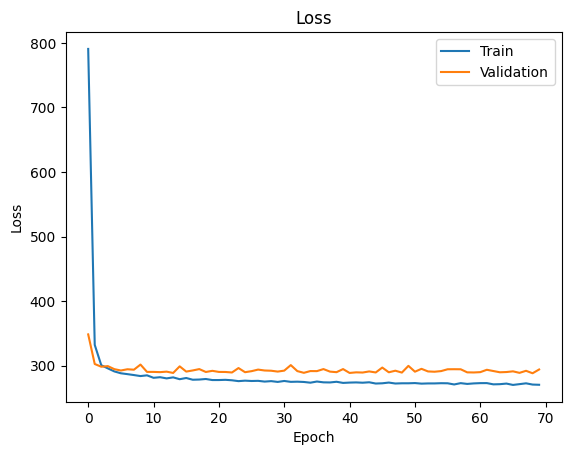

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [15]:
X_train_new['Encoded_Exercise_Type'] = X_train_new['Exercise_Type'].map(categorical_encoder)

# Merge selected rows from cat_emb_df with X_train_new
X_train_new = pd.merge(X_train_new, cat_emb_df, left_on='Encoded_Exercise_Type', right_index=True, how='left')

# Drop unnecessary columns and reset the index
X_train_new.drop(columns=['Encoded_Exercise_Type'], inplace=True)
X_train_new.reset_index(drop=True, inplace=True)

# Display the updated X_train_new DataFrame
print(X_train_new.head())

  Gender_female Gender_male   User_ID                    Exercise_Type Age  \
0           0.0         1.0  14687327                       Unicycling  37   
1           1.0         0.0  19861664          Canoeing, rowing, light  23   
2           0.0         1.0  13725013    Rowing machine, very vigorous  28   
3           0.0         1.0  15179324                  Walking 2.5 mph  66   
4           0.0         1.0  14970072  Running, 5 mph (12 minute mile)  44   

  Height Weight Duration Heart_Rate Body_Temp  ...  cat_40_y  cat_41_y  \
0  178.0   88.0      7.0       86.0      39.2  ...  0.012947  0.017461   
1  149.0   47.0     28.0      114.0      40.8  ...  0.021504  0.030400   
2  186.0   78.0     19.0       91.0      40.2  ... -0.167432  0.104217   
3  181.0   88.0     28.0      104.0      41.0  ...  0.141132  0.042555   
4  183.0   83.0     11.0       96.0      40.1  ... -0.004667 -0.030159   

   cat_42_y  cat_43_y  cat_44_y  cat_45_y  cat_46_y  cat_47_y  cat_48_y  \
0 -0.160790

In [14]:
from numpy.linalg import norm

first_row_list = cat_emb_df.iloc[107,1:].tolist()
second_row_list = cat_emb_df.iloc[109,1:].tolist()

# define two lists or array
A = np.array(first_row_list)
B = np.array(second_row_list)
 
print("A:", A)
print("B:", B)
 
# compute cosine similarity
cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)

A: [ 0.00772628  0.07328884  0.00118505 -0.04878261  0.01014055  0.07410637
 -0.03872401 -0.02546586  0.00625319 -0.06161264  0.0009579  -0.06377655
 -0.00284953 -0.17802061  0.08059459 -0.00629509  0.09676655  0.0944896
 -0.13216852  0.08489577  0.01010923 -0.0200453  -0.15500309  0.07207149
 -0.01366707  0.09124877 -0.16640334  0.02439778  0.01034598 -0.01676187
  0.03703535 -0.0691475  -0.05788023 -0.0466846   0.02733768  0.00259071
  0.03403438  0.00798308  0.01918284  0.13435864 -0.05952428  0.03421656
  0.02751113  0.14191936  0.05303628  0.04422261  0.14455552 -0.08679049
 -0.02338916]
B: [-0.06563143  0.05490445 -0.06182194 -0.08715181  0.04045366  0.11465588
 -0.07154909 -0.06335064 -0.05497599  0.07182948 -0.10536128 -0.06346337
 -0.04227628  0.03814846 -0.01590221 -0.06554657  0.11225393 -0.101748
  0.05068434  0.04147695 -0.08167501 -0.07744024  0.02632629  0.09124222
  0.0901327   0.0511154   0.0417099  -0.05452101 -0.0647275  -0.08466076
  0.09252313  0.04601132 -0.059942